In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:05<00:00, 298MB/s]
100% 1.06G/1.06G [00:05<00:00, 201MB/s]


In [5]:
# Data is in zipped format
# Unzipping it

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# Imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalising
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.5595 - loss: 2.3389 - val_accuracy: 0.6324 - val_loss: 0.6355
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6664 - loss: 0.6090 - val_accuracy: 0.6784 - val_loss: 0.5985
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7281 - loss: 0.5599 - val_accuracy: 0.7090 - val_loss: 0.5820
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.7896 - loss: 0.4583 - val_accuracy: 0.7342 - val_loss: 0.5600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8242 - loss: 0.3945 - val_accuracy: 0.8064 - val_loss: 0.4217
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.8513 - loss: 0.3477 - val_accuracy: 0.7078 - val_loss: 0.5672
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8808 - loss: 0.2752 - val_accuracy: 0.7854 - val_loss: 0.4652
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9044 - loss: 0.2231 - 

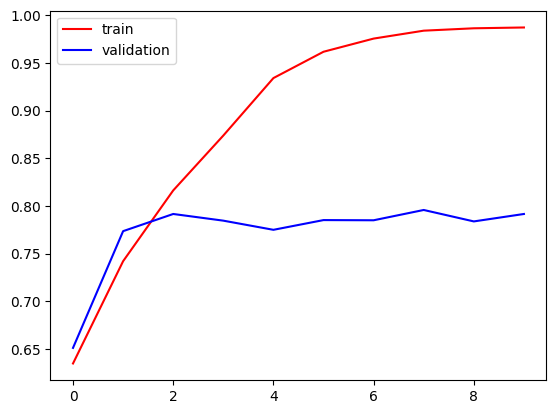

In [ ]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

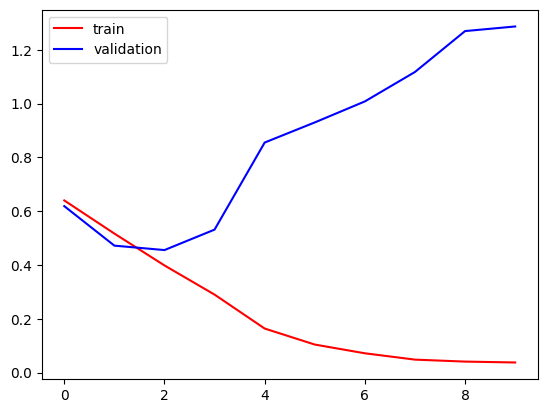

In [ ]:
# Plotting losses wrt to epochs
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#  Since it is overfitting
# Trying Batch Normalization and adding Dropout layer

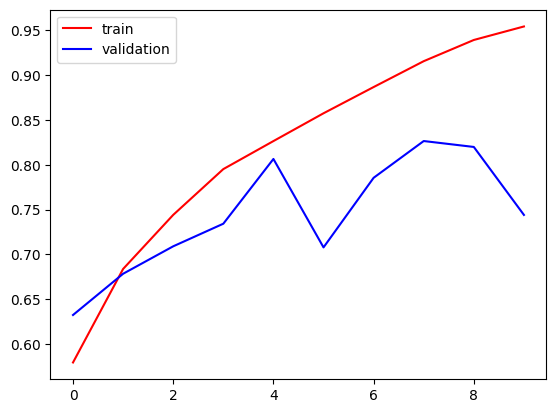

In [ ]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

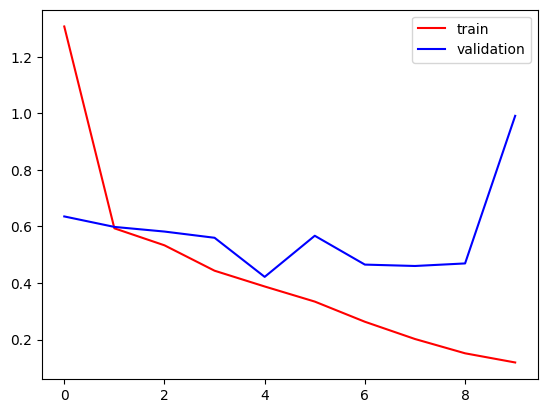

In [ ]:
# Plotting losses wrt to epochs
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [9]:
# This implementation was using
# Activation - ReLU
# Optimizer - Adam
# Initialization - Random

# Now Implementation Using :
# Activation - TanH
# Optimization - RMSProp
# Initialization - Xavier

In [10]:
# Create CNN Model
model_tanh = Sequential()

model_tanh.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='tanh', kernel_initializer='glorot_normal', input_shape=(256,256,3)))
model_tanh.add(BatchNormalization())
model_tanh.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_tanh.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='tanh', kernel_initializer='glorot_normal'))
model_tanh.add(BatchNormalization())
model_tanh.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_tanh.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='tanh', kernel_initializer='glorot_normal'))
model_tanh.add(BatchNormalization())
model_tanh.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_tanh.add(Flatten())

model_tanh.add(Dense(128, activation='tanh'))
model_tanh.add(Dropout(0.1))
model_tanh.add(Dense(64, activation='tanh'))
model_tanh.add(Dropout(0.1))
model_tanh.add(Dense(1, activation='sigmoid'))

# Compile Model
model_tanh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_tanh = model_tanh.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 93ms/step - accuracy: 0.5606 - loss: 0.7360 - val_accuracy: 0.5122 - val_loss: 0.7077
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.5777 - loss: 0.6803 - val_accuracy: 0.5024 - val_loss: 0.7339
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.5676 - loss: 0.6807 - val_accuracy: 0.5894 - val_loss: 0.6651
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5924 - loss: 0.6639 - val_accuracy: 0.6328 - val_loss: 0.6368
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6120 - loss: 0.6490 - val_accuracy: 0.5362 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6280 - loss: 0.6376 - val_accuracy: 0.6122 - val_loss: 0.6580
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.6245 - loss: 0.6421 - val_accuracy: 0.5186 - val_loss: 0.7480
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.6312 - loss: 0.6410 - 

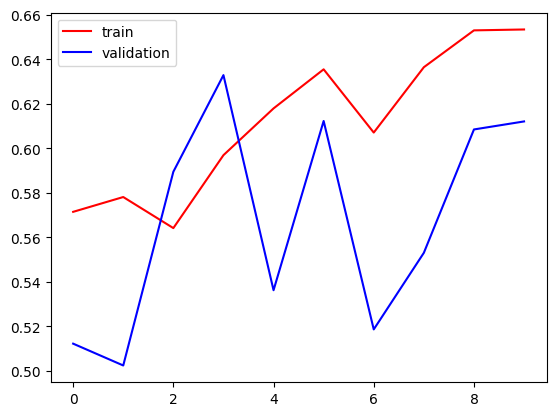

In [11]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_tanh.history['accuracy'],color='red',label='train')
plt.plot(history_tanh.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

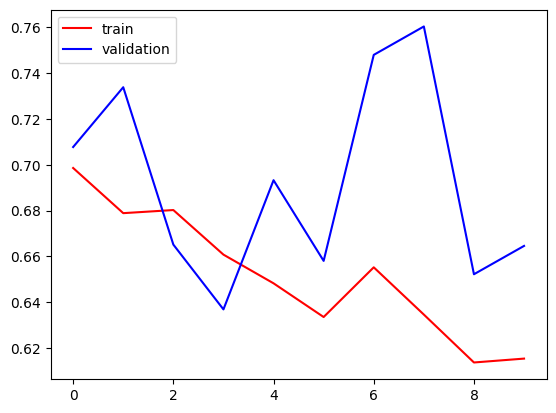

In [12]:
# Plotting losses wrt to epochs
plt.plot(history_tanh.history['loss'],color='red',label='train')
plt.plot(history_tanh.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
# Now implementation using :
# Activation - LeakyReLU
# Optimization - SGD
# Initialization - Kaiming

In [13]:
from keras.layers import LeakyReLU

# Create CNN Model
model_leakyrelu = Sequential()

model_leakyrelu.add(Conv2D(32, kernel_size=(3,3), padding='valid', kernel_initializer='he_uniform', input_shape=(256,256,3)))
model_leakyrelu.add(LeakyReLU(alpha=0.01))
model_leakyrelu.add(BatchNormalization())
model_leakyrelu.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_leakyrelu.add(Conv2D(64, kernel_size=(3,3), padding='valid', kernel_initializer='he_uniform'))
model_leakyrelu.add(LeakyReLU(alpha=0.01))
model_leakyrelu.add(BatchNormalization())
model_leakyrelu.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_leakyrelu.add(Conv2D(128, kernel_size=(3,3), padding='valid', kernel_initializer='he_uniform'))
model_leakyrelu.add(LeakyReLU(alpha=0.01))
model_leakyrelu.add(BatchNormalization())
model_leakyrelu.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_leakyrelu.add(Flatten())

model_leakyrelu.add(Dense(128))
model_leakyrelu.add(LeakyReLU(alpha=0.01))
model_leakyrelu.add(Dropout(0.1))
model_leakyrelu.add(Dense(64))
model_leakyrelu.add(LeakyReLU(alpha=0.01))
model_leakyrelu.add(Dropout(0.1))
model_leakyrelu.add(Dense(1, activation='sigmoid'))

# Compile Model
model_leakyrelu.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_leakyrelu = model_leakyrelu.fit(train_ds, epochs=10, validation_data=validation_ds)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 80ms/step - accuracy: 0.6494 - loss: 0.6654 - val_accuracy: 0.7284 - val_loss: 0.5312
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7818 - loss: 0.4528 - val_accuracy: 0.7736 - val_loss: 0.4835
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.8479 - loss: 0.3469 - val_accuracy: 0.7800 - val_loss: 0.4813
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.8973 - loss: 0.2475 - val_accuracy: 0.7946 - val_loss: 0.5634
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9339 - loss: 0.1710 - val_accuracy: 0.7880 - val_loss: 0.5856
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9600 - loss: 0.1056 - val_accuracy: 0.7742 - val_loss: 0.6065
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9732 - loss: 0.0752 - val_accuracy: 0.7846 - val_loss: 0.7701
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9788 - loss: 0.0584 - 

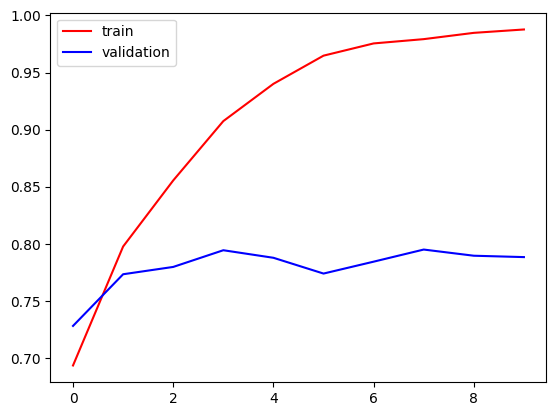

In [14]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_leakyrelu.history['accuracy'],color='red',label='train')
plt.plot(history_leakyrelu.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

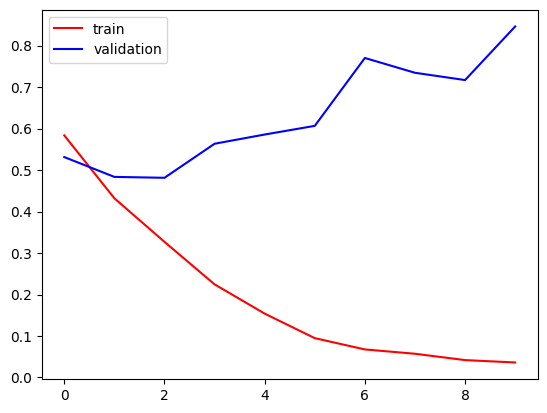

In [15]:
# Plotting losses wrt to epochs
plt.plot(history_leakyrelu.history['loss'],color='red',label='train')
plt.plot(history_leakyrelu.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# So here we have created 3 models

# Model 1 : ReLU Activation, Random Initalization and Adam Optimizer
# Training Accuracy : 95.01%
# Validation Accuracy : 74.4%


# Model 2 : TanH Activation, RMSProp Initalization and Xavier Optimizer
# Training Accuracy : 64.94%
# Validation Accuracy : 61.20%

# Model 3 : LeakyReLU Activation, Kaiming Initalization and SGD Optimizer
# Training Accuracy : 98.61%
# Validation Accuracy : 78.86%

In [17]:
# Our best model is model 3
# So saving its weights

In [19]:
model_leakyrelu.save_weights('/content/best_model_cats_dogs.weights.h5')


In [20]:
# Loading Pretrained ResNet-18

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load ResNet-50 (Closest to ResNet-18 in TF)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze the base model

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

# Create Model
resnet_model = Model(inputs=base_model.input, outputs=output)
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
# Training the model
history_resnet = resnet_model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 131ms/step - accuracy: 0.5421 - loss: 0.6955 - val_accuracy: 0.6160 - val_loss: 0.6610
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.5913 - loss: 0.6612 - val_accuracy: 0.6304 - val_loss: 0.6482
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.6077 - loss: 0.6557 - val_accuracy: 0.6250 - val_loss: 0.6556
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 131ms/step - accuracy: 0.6098 - loss: 0.6548 - val_accuracy: 0.6374 - val_loss: 0.6449
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.6270 - loss: 0.6443 - val_accuracy: 0.6126 - val_loss: 0.6587
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.6285 - loss: 0.6426 - val_accuracy: 0.6288 - val_loss: 0.6336
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.6371 - loss: 0.6385 - val_accuracy: 0.6580 - val_loss: 0.6263
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 121ms/step - accuracy: 0.6408 - loss: 0

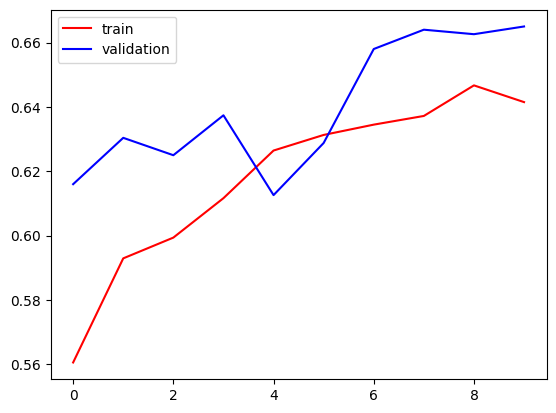

In [29]:
# Plotting accuracies
import matplotlib.pyplot as plt
plt.plot(history_resnet.history['accuracy'],color='red',label='train')
plt.plot(history_resnet.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

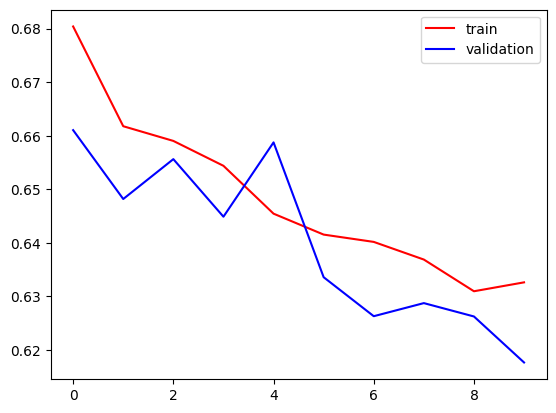

In [30]:
# Plotting losses wrt to epochs
plt.plot(history_resnet.history['loss'],color='red',label='train')
plt.plot(history_resnet.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
# Saving Resnet Weights
resnet_model.save_weights('/content/resnet_model_cats_dogs.weights.h5')